In [1]:
%reload_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
import cv2
from pathlib import Path
im_path = '/Users/jerrypiglet/Documents/Projects/OpenRooms_RAW_loader/data/replica_v1/room_0/textures/0-color-ptex.hdr'
xx = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)

In [8]:
xx.shape, np.amax(xx), np.amin(xx)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
import sys
PATH_HOME = '/Users/jerrypiglet/Documents/Projects/OpenRooms_RAW_loader'
# PATH_HOME = '/home/ruizhu/Documents/Projects/dvgomm1'
# PATH_HOME = '/usr2/rzh/Documents/Projects/directvoxgorui'
sys.path.insert(0, PATH_HOME)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np
np.set_printoptions(suppress=True)
from lib.utils_io import load_matrix, load_img, load_binary, load_h5

from lib.class_openroomsScene2D import openroomsScene2D
from lib.class_visualizer_openroomsScene_2D import visualizer_openroomsScene_2D

from lib.utils_misc import str2bool
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--vis_2d', type=str2bool, nargs='?', const=True, default=False, help='whether to show projection onto one image with plt (e.g. layout, object bboxes')
parser.add_argument('--if_shader', type=str2bool, nargs='?', const=True, default=True, help='')
opt = parser.parse_args('--vis_2d True'.split(' '))

base_root = Path(PATH_HOME) / 'data/openrooms_scene_dataset_2'
xml_root = Path(PATH_HOME) / 'data/openrooms_scene_dataset_2/scenes'
intrinsics_path = Path(PATH_HOME) / 'data/intrinsic.txt'
semantic_labels_root = Path(PATH_HOME) / 'data'

# meta_split = 'main_xml'
# scene_name = 'scene0008_00'
# frame_ids = [58] + list(range(1, 102, 50)) # scene_name = 'scene0008_00' # every 10; scene0008_00 public_re

# scene_name = 'scene0008_00'
# frame_ids = [58] + list(range(1, 102, 50)) # scene_name = 'scene0008_00' # every 10; scene0008_00 public_re

# scene_name = 'scene0005_00'
# frame_ids = [15] + list(range(1, 113, 10))

meta_split = 'main_xml1'
scene_name = 'scene0552_00_more'
frame_ids = list(range(0, 87, 10))

openrooms_scene = openroomsScene2D(
    root_path_dict = {
        'rendering_root': Path(base_root), 
        'xml_scene_root': Path(xml_root), 
        'semantic_labels_root': semantic_labels_root, 
        'intrinsics_path': Path(intrinsics_path)
        }, 
    scene_params_dict={
        'meta_split': meta_split, 
        'scene_name': scene_name, 
        'frame_id_list': frame_ids}, 
    modality_list = [
        'im_sdr', 'im_hdr', 'seg', 'poses', 
#         'albedo', 'roughness', 
#         'depth', 'normal', 
        'matseg', 
        # 'lighting_SG', 'lighting_envmap'
        ], 
    # modality_list = ['im_sdr', 'poses', 'depth', 'normal', 'lighting_SG'], 
    im_params_dict={'im_H_load': 480, 'im_W_load': 640, 'im_H_resize': 240, 'im_W_resize': 320}, 
)

In [ ]:
if opt.vis_2d:
    vis_2D = visualizer_openroomsScene_2D(
        openrooms_scene, 
        modality_list=[
            'matseg', 
#             'depth', 'normal', 'albedo', 'roughness', 
            ], 
        frame_idx_list=[0, 1, 2, 3, 4], # 0-based indexing of all selected frames
    )
    vis_2D.vis_2d_with_plt()

> /Users/jerrypiglet/Documents/Projects/OpenRooms_RAW_loader/lib/utils_vis.py(25)vis_index_map()
     24     import ipdb; ipdb.set_trace()
---> 25     index_map_vis = np.zeros((index_map.shape[0], index_map.shape[1], 3))
     26     for color_idx, color in enumerate(colors):

ipdb> colors
[(0.9517318861892078, 0.07813224910292893, 0.07813224910292893), (0.9966570688053223, 0.47762688763641825, 0.03274387520592892), (0.9899922600684502, 0.9256512527984059, 0.15355916555787374), (0.6252387959950703, 0.9801479514868057, 0.0573841472082941), (0.2627536455968145, 0.9985373270461699, 0.12897479442420434), (0.1676811500120865, 0.9574113864993419, 0.41067506893124195), (0.21390389136839405, 0.9603771463172456, 0.7881140874828955), (0.20303901300459692, 0.8010518431056914, 0.9804556921360206), (0.1613859555690934, 0.4124027709316086, 0.9771906054972689), (0.27712870390152494, 0.15252063840809094, 0.962473064115415), (0.6695686641508707, 0.1427676270331747, 0.9988193123494319), (0.96458479924201

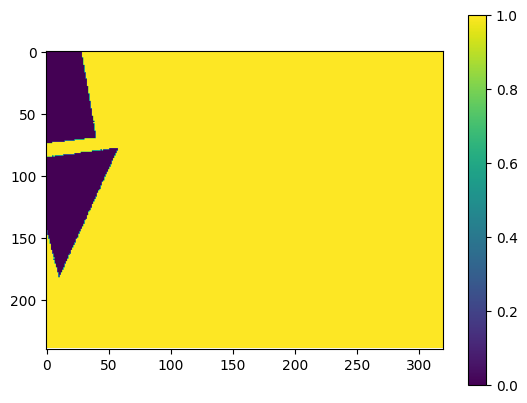

In [21]:
a = openrooms_scene.matseg_list[0]
a.keys()
mat_aggre_map = a['mat_aggre_map']
instance = a['instance']
semantic = a['semantic']

plt.figure()
plt.imshow(semantic.numpy().squeeze())
plt.colorbar()
plt.show()
# for _ in instance:
#     _ = _.numpy()
#     plt.figure()
#     plt.imshow(_)
#     plt.colorbar()
#     plt.show()

In [11]:
plt.figure()
plt.imshow(mat_aggre_map==0)
plt.colorbar()
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>